In [1]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Check annotations' labels

In [2]:
names_filename = '../names.txt'
names = pd.read_csv(names_filename, header=None, sep=' ')
names

,0
0,circle
1,square


# Load and show test image

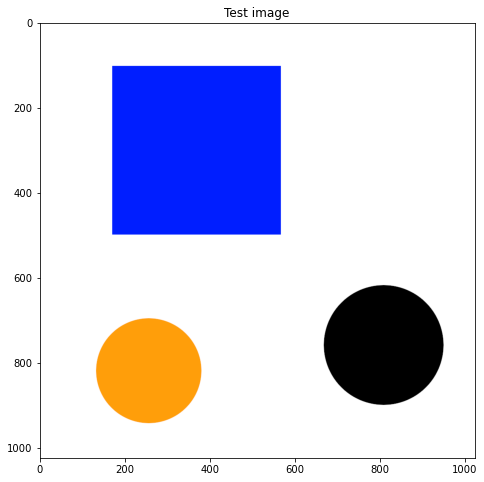

In [3]:
img_id = 3
img_filename = f'../test_images/img{str(img_id).zfill(2)}.png'
img_test = plt.imread(img_filename)
if img_test.dtype != np.uint8:
    img_test = (255 * img_test).astype(np.uint8)

plt.figure(figsize=(8,8))
plt.title('Test image')
plt.imshow(img_test);

# Load annotations for the test image

In [4]:
ann_filename = f'../test_images/img{str(img_id).zfill(2)}.txt'
ann_test = pd.read_csv(ann_filename, header=None, sep=' ')
ann_test

,0,1,2,3,4
0,1,0.357857,0.291429,0.427143,0.425714
1,0,0.245714,0.796429,0.328571,0.284286
2,0,0.777857,0.736429,0.344286,0.324286


# Add annotations to the test image and show the result

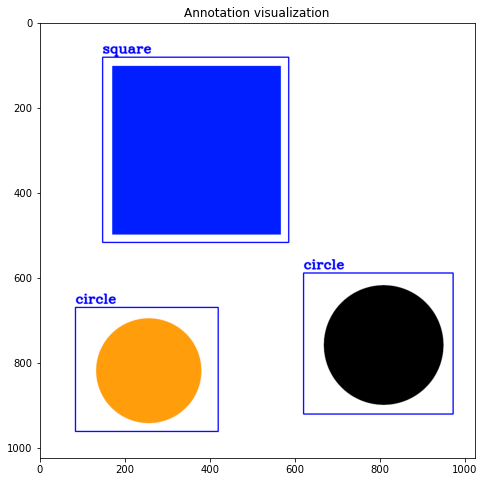

In [5]:
img_h, img_w = img_test.shape[:2]

for ann in ann_test.values:
    label_id, x, y, w, h = tuple(ann)
    label = names.loc[:,0].values[int(label_id)]
    margin = 10
    ann_color = (0,0,255)

    cv2.rectangle(img_test,
                  (int((x-w/2)*img_w), int((y-h/2)*img_h)),
                  (int((x+w/2)*img_w), int((y+h/2)*img_h)),
                  ann_color, 2)

    cv2.putText(img_test, label, (int((x-w/2)*img_w), int((y-h/2)*img_h) - margin),
                cv2.FONT_HERSHEY_COMPLEX, 1, ann_color, 2, cv2.LINE_AA)

plt.figure(figsize=(8,8))
plt.title('Annotation visualization')
plt.imshow(img_test);